<a href="https://colab.research.google.com/github/rocket0l4/feature-scaling/blob/main/Standardization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
df = pd.read_csv('/content/drive/MyDrive/Social_Network_Ads.csv')

In [200]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [201]:
# df = df.iloc[:,2:]

In [202]:
df.sample(5)

,Age,EstimatedSalary,Purchased
315,39,75000,1
361,53,34000,1
172,26,118000,0
182,32,117000,1
112,38,61000,0


#Train test split

In [203]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),
                                                 df['Purchased'],
                                                 test_size=0.3,
                                                 random_state=0)
X_train.shape,X_test.shape

((280, 2), (120, 2))

#StandardScaler


In [204]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [205]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [206]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [207]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [208]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


#Effect of Scaling

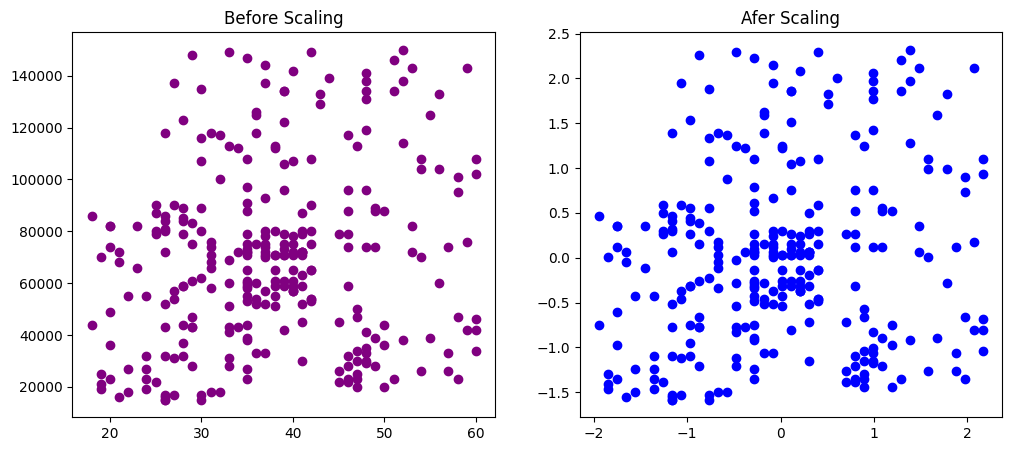

In [209]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'],color='purple')
ax1.set_title('Before Scaling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='blue')
ax2.set_title('Afer Scaling')
plt.show()

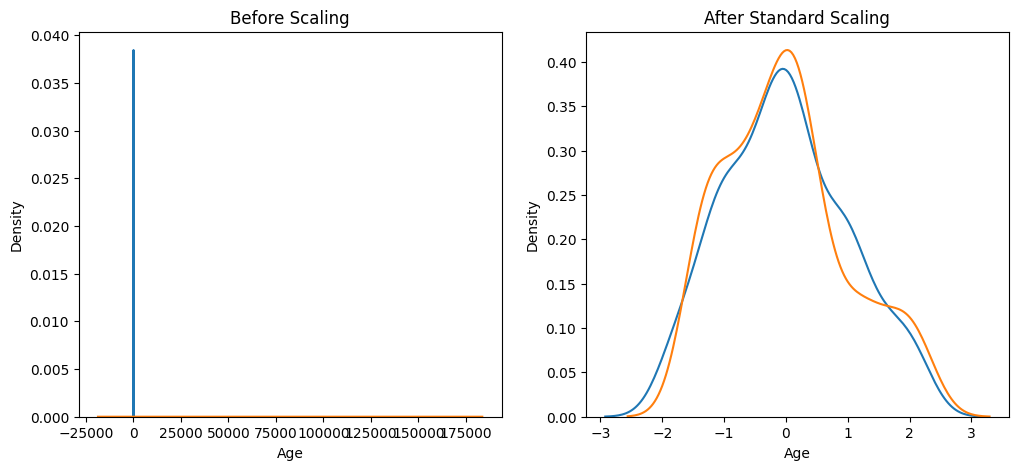

In [210]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

#before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

#after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

#comparison of Distributions

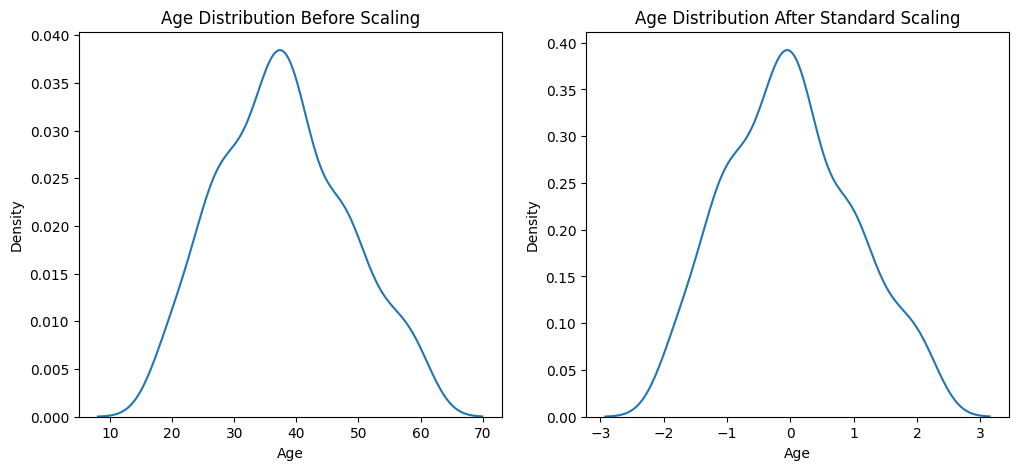

In [211]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

#before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'],ax=ax1)
# sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

#after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
# sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

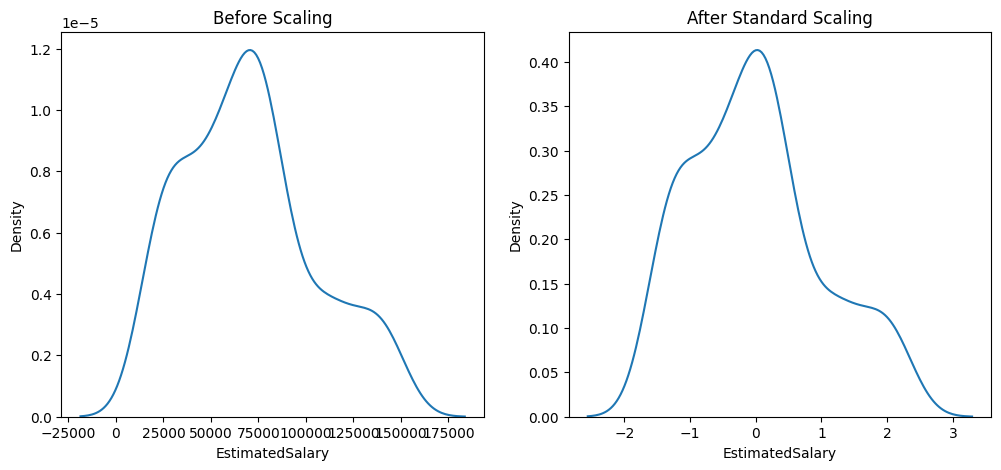

In [212]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

#before scaling
ax1.set_title('Before Scaling')
# sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

#after scaling
ax2.set_title('After Standard Scaling')
# sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

#Why Sclaing

In [213]:
from sklearn.linear_model import LogisticRegression

In [214]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [215]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [216]:
from sklearn.metrics import accuracy_score

In [217]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

- the effect of standrdization on Logistic Regression,as we can clearly see the difference of Actual and sclaed score.

In [218]:
print('Actual',accuracy_score(y_test,y_pred))
print('Scaled',accuracy_score(y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


In [219]:
from sklearn.tree import DecisionTreeClassifier

In [220]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [221]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [222]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

- there is no effect of standardization on Decision Tree classifier, as we can see the accuracy score.

In [223]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.875


In [224]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


#Effect of Outliers
#***the ways to add outlier in data***

- outlier behave like outlier nothing else,as we can see in the plot.


In [225]:
# Use the concat function instead of append
df = pd.concat([df, pd.DataFrame({'Age':[5,90,108],'EstimatedSalary':[100,250000,3],'Purchased':[0,1,1]})], ignore_index=True)

In [226]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,100,0
401,90,250000,1


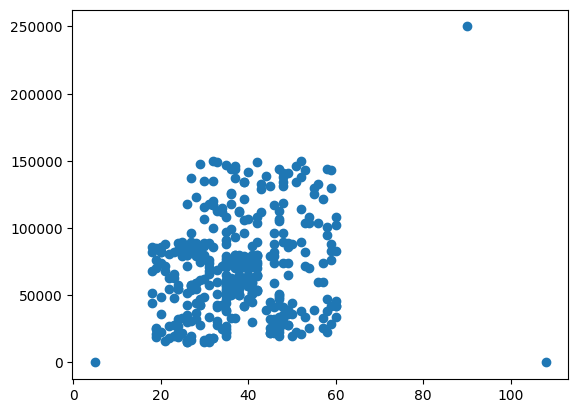

In [227]:
plt.scatter(df['Age'],df['EstimatedSalary'])